# Lab 1 - Lesson 1: Dataset exploration and Zipf

**What we use**
- `datasets` to download and slice a small dataset subset.
- `Counter` to count tokens and build a frequency dictionary.
- `matplotlib` to plot a Zipf curve on log-log axes.

**Goals**
- Load a small dataset subset with `datasets`.
- Compute token frequencies and plot Zipf on log-log axes.
- Inspect samples and dataset fields.

**Notes to keep in mind**
- More word types, shorter lemmas, and a larger highest rank often indicate a more morphologically rich language.
- A shallower Zipf slope often indicates a more morphologically rich language.
- The straightness of a Zipf plot is not related to morphology.
- If the same surface word appears with different lemmas in counts, it is ambiguous.


## Step 1: Load and inspect the dataset
We start by loading a dataset from the Hugging Face Hub and selecting a small subset
The Hugging Face Hub is an online repository of datasets and models; `datasets.load_dataset` downloads from the Hub when needed.
so the notebook runs quickly.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [2]:
help(load_dataset)

Help on function load_dataset in module datasets.load:

load_dataset(path: str, name: Optional[str] = None, data_dir: Optional[str] = None, data_files: Union[str, collections.abc.Sequence[str], collections.abc.Mapping[str, Union[str, collections.abc.Sequence[str]]], NoneType] = None, split: Union[str, datasets.splits.Split, list[str], list[datasets.splits.Split], NoneType] = None, cache_dir: Optional[str] = None, features: Optional[datasets.features.features.Features] = None, download_config: Optional[datasets.download.download_config.DownloadConfig] = None, download_mode: Union[datasets.download.download_manager.DownloadMode, str, NoneType] = None, verification_mode: Union[datasets.utils.info_utils.VerificationMode, str, NoneType] = None, keep_in_memory: Optional[bool] = None, save_infos: bool = False, revision: Union[datasets.utils.version.Version, str, NoneType] = None, token: Union[bool, str, NoneType] = None, streaming: bool = False, num_proc: Optional[int] = None, storage_options

In [3]:
# Dataset choice
# Option A: name = 'ag_news', text_field = 'text'
# Option B: name = 'wikitext', config = 'wikitext-2-raw-v1', text_field = 'text'
name = 'wikitext'
config = 'wikitext-2-raw-v1'
text_field = 'text'

if config:
    ds = load_dataset(name, config, split='train')
else:
    ds = load_dataset(name, split='train')

subset = ds.select(range(2000))
print(subset.features)
print(subset[0])


{'text': Value('string')}
{'text': ''}


### Practice A: Create two subsets
Create two different slices of the dataset and compare their sizes.


In [16]:
range(2001, 4001)

range(2001, 4001)

In [ ]:
subset_a = ds.select(range(2000))
subset_b = ds.select(range(2000, 4000))

# Write your code below this line

In [23]:
subset[0]

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'label': 2}

In [24]:
for i in range(3):
    print('---')
    print(subset[i][text_field])

---
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
---
Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
---
Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.


## Step 2: Tokenize and count
We use a simple whitespace tokenizer to keep the logic clear.
Then we count tokens and types with `Counter`.


In [26]:
def tokenize_whitespace(text):
    return text.lower().split()

def get_token_counts(texts):
    # TODO: implement token counting with Counter
    counts = Counter()
    for t in texts:
        counts.update(tokenize_whitespace(t))
    return counts


In [38]:
subset[0]

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'label': 2}

In [44]:
d = {"a": 1, "b": 2}
d["a"]

1

In [49]:
from collections import Counter

count = Counter()

In [52]:
count

Counter({'wall': 2,
         'st.': 1,
         'bears': 1,
         'claw': 1,
         'back': 1,
         'into': 1,
         'the': 1,
         'black': 1,
         '(reuters)': 1,
         'reuters': 1,
         '-': 1,
         'short-sellers,': 1,
         "street's": 1,
         'dwindling\\band': 1,
         'of': 1,
         'ultra-cynics,': 1,
         'are': 1,
         'seeing': 1,
         'green': 1,
         'again.': 1})

In [51]:
count.update(tokenize_whitespace(text_collection[0]))

In [106]:
count[""]

0

In [110]:
def extract_texts(dataset, text_field):
    return [row[text_field] for row in dataset]

In [107]:
text_collection = []

for row in subset:
    text_collection.append(row[text_field])

token_counter = get_token_counts(text_collection)
unique_token_count = len(token_counter)
total_token_count = sum(token_counter.values())

print(f"Unique tokens: {unique_token_count}")
print(f"Total tokens: {total_token_count}")

Unique tokens: 12729
Total tokens: 117015


In [67]:
token_counter.most_common(20)

[('the', 3527),
 ('to', 2024),
 ('a', 1936),
 ('in', 1753),
 ('of', 1653),
 ('and', 1239),
 ('-', 1011),
 ('on', 993),
 ('for', 866),
 ('as', 444),
 ('that', 440),
 ('with', 428),
 ('(reuters)', 423),
 ('by', 403),
 ('is', 389),
 ('at', 385),
 ('new', 376),
 ('its', 351),
 ('from', 321),
 ('it', 306)]

### Practice B: Extra frequency stats
Compute type/token ratio and average whitespace length.


**Type/token ratio** is the number of unique word types divided by the total number of tokens.
It is a rough proxy for lexical diversity in a sample.

**Average whitespace length** is the average number of whitespace-separated tokens per sentence.
It is a simple length measure before any advanced tokenization.


In [ ]:
def avg_whitespace_len(texts):
    # TODO: compute average whitespace token length
    # Hint: lengths = [len(tokenize_whitespace(t)) for t in texts]
    # Hint: avoid division by zero with max(len(lengths), 1)
    raise NotImplementedError

# TODO: compute type_token_ratio and avg_len
# Hint: type_token_ratio = total_types / total_tokens
# TODO: print the results


## Step 3: Plot Zipf
We first plot on linear axes to see why the long tail is hard to read,
then switch to log-log axes for a clearer Zipf pattern.


### Step 3a: Linear scale (less informative)
We first plot the same data on linear axes to see why the long tail is hard to read.


$y = e^x$

$z = \log y = x $

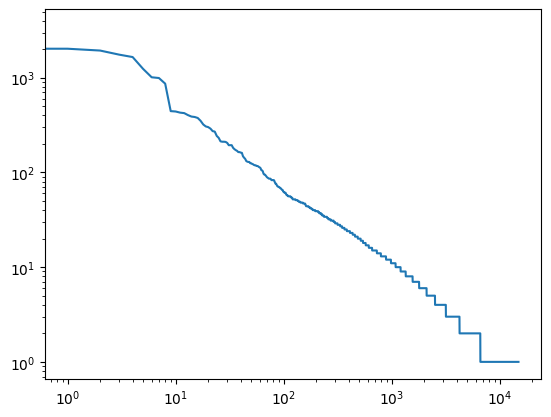

In [86]:
freqs = sorted(token_counter.values())[::-1]

plt.loglog(freqs)

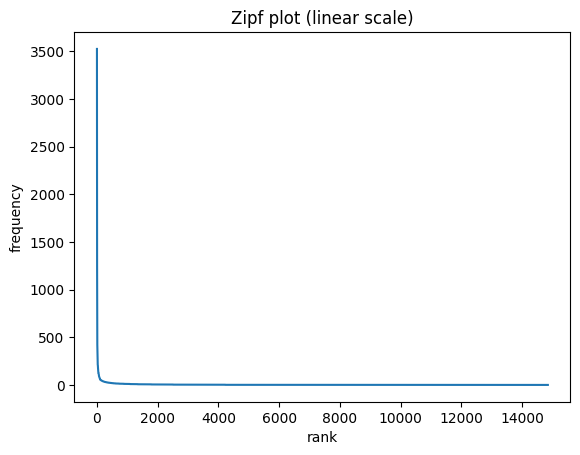

In [88]:
freqs = sorted(token_counter.values(), reverse=True)
ranks = range(1, len(freqs) + 1)

# Linear-scale version (for contrast)
#plt.figure(figsize=(6, 4))
plt.plot(ranks, freqs)
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Zipf plot (linear scale)')
plt.show()


### Step 3b: Log-log scale (more informative)
Log-log axes compress the long tail and make Zipf behavior visible.


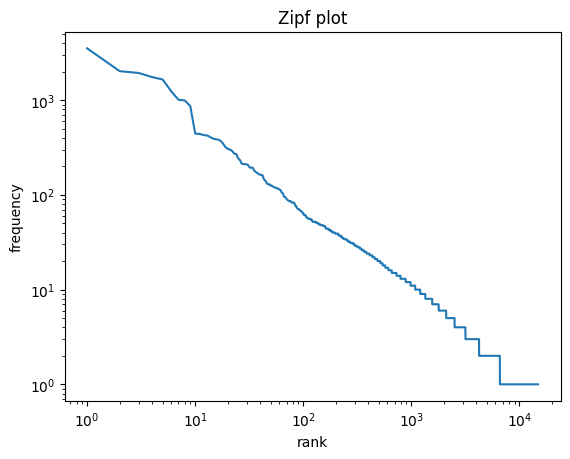

In [95]:
freqs = sorted(token_counter.values(), reverse=True)
ranks = range(1, len(freqs) + 1)

#plt.figure(figsize=(6, 4))
plt.loglog(ranks, freqs)
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Zipf plot')
plt.show()


### Practice C: Compare Zipf plots
Plot Zipf curves for two different subsets on the same axes.


In [101]:
subset_a = load_dataset("ag_news", split='train[:2000]')

In [105]:
subset_b = load_dataset('wikitext', name='wikitext-2-raw-v1', split='train')

In [111]:
counts_a = get_token_counts(extract_texts(subset_a, text_field))
counts_b = get_token_counts(extract_texts(subset_b, text_field))

In [114]:
def normalize(freqs):
    total = sum(freqs) + 1
    return [f / total for f in freqs]

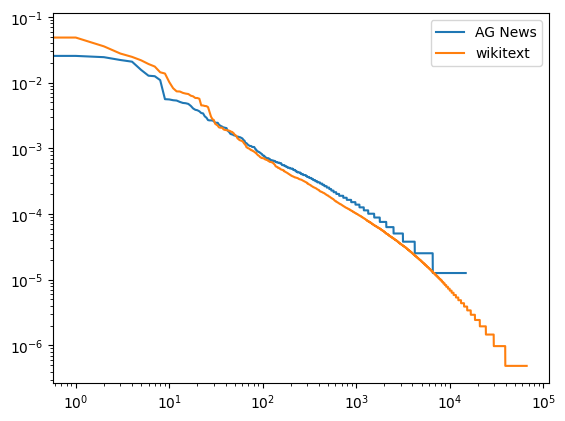

In [117]:
freqs_a = normalize(sorted(counts_a.values(), reverse=True))
freqs_b = normalize(sorted(counts_b.values(), reverse=True))

plt.loglog(freqs_a, label='AG News')
plt.loglog(freqs_b, label='wikitext')

plt.legend()
plt.show()

In [ ]:
# TODO: build texts_a and texts_b from subset_a and subset_b
# Hint: filter out empty strings with .strip()
# TODO: compute counts and frequency lists for both subsets
# Hint: counts = get_token_counts(texts)
# TODO: plot both Zipf curves on the same axes with labels
# Hint: use plt.loglog for each and plt.legend()

**Homework**
- Pick TWO different datasets from the Hugging Face Hub that we did **not** use in the lesson.
  Suggested options: `imdb`, `yelp_polarity`, `dbpedia_14`, `rotten_tomatoes`, `trec`.
- For each dataset: create Zipf plots for two non-overlapping subsets (keep sizes equal).
- For each dataset: print top-10 tokens for each subset and note 2 differences.
- For each dataset: compute type/token ratio for each subset and compare.
